In [74]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import tensorflow as tf
from tensorflow import keras

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [77]:
#Loading the dataset

df = pd.read_csv('bearing_dataset.csv')

In [78]:
#Showing the first 5 rows

df.head()

,Horiz_Acc,Ver_Acc,Total_Sec
0,0.501,-0.480,34779
1,0.138,0.435,34779
2,-0.423,0.240,34779
3,-0.802,0.020,34779
4,-0.364,0.112,34779


In [79]:
df

,Horiz_Acc,Ver_Acc,Total_Sec
0,0.501000,-0.480000,34779
1,0.138000,0.435000,34779
2,-0.423000,0.240000,34779
3,-0.802000,0.020000,34779
4,-0.364000,0.112000,34779
...,...,...,...
30714,-0.863864,0.919520,29665
30715,-0.813814,0.873874,29665
30716,-0.807407,0.843644,29665
30717,-0.874274,0.872673,29665


In [80]:
# To show some information of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30719 entries, 0 to 30718
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Horiz_Acc  30719 non-null  float64
 1   Ver_Acc    30719 non-null  float64
 2   Total_Sec  30719 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 720.1 KB


In [81]:
# Unique values of 'Total_Sec' feature

df['Total_Sec'].unique()

array([34779, 34789, 34799, 34809, 34819, 34829, 34839, 34849, 34859,
       34869, 29655, 29665], dtype=int64)

In [82]:
#To show some statistical parameters

df.describe()

,Horiz_Acc,Ver_Acc,Total_Sec
count,30719.000000,30719.000000,30719.000000
mean,0.037754,-0.058580,33963.306781
std,0.583368,0.575612,1924.745893
min,-1.763000,-1.569000,29655.000000
25%,-0.442042,-0.608308,34789.000000
50%,0.000701,-0.085686,34819.000000
75%,0.536336,0.431632,34844.000000
max,2.010000,1.591000,34869.000000


In [83]:
#Pearson's Correlation

df.corr()

,Horiz_Acc,Ver_Acc,Total_Sec
Horiz_Acc,1.000000,-0.684093,0.639752
Ver_Acc,-0.684093,1.000000,-0.659738
Total_Sec,0.639752,-0.659738,1.000000


<AxesSubplot:xlabel='Horiz_Acc', ylabel='Count'>

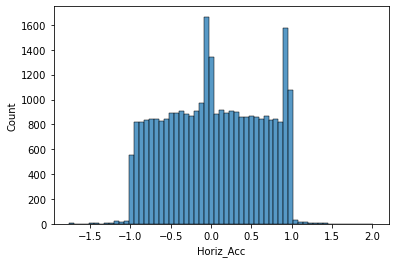

In [84]:
# Hisgram of 'Horiz_Acc' feature

sns.histplot(df['Horiz_Acc'])

<AxesSubplot:xlabel='Ver_Acc', ylabel='Count'>

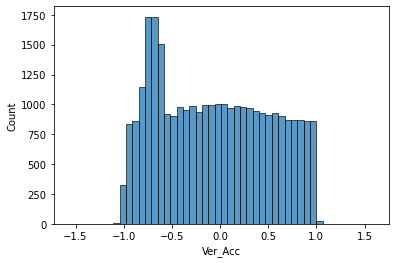

In [85]:
# Hisgram of 'Ver_Acc' feature

sns.histplot(df['Ver_Acc'])

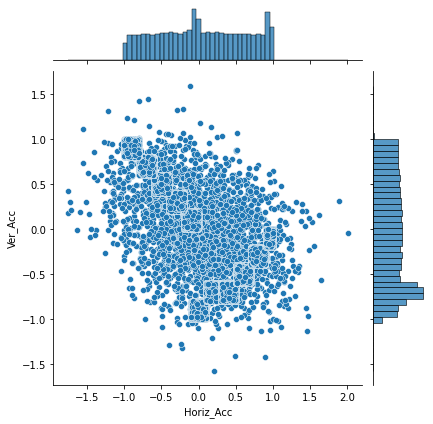

In [86]:
# Jointplot of 'Horiz_Acc' & 'Ver_Acc'

sns.jointplot(x='Horiz_Acc', y='Ver_Acc', data=df)

<AxesSubplot:>

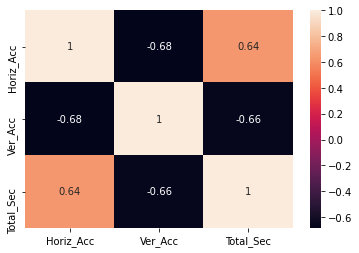

In [87]:
# Heatmap of the data set with pearson's correlation

sns.heatmap(df.corr(), annot=True)

***

In [88]:
# Split the dataset with respect to features

X = np.array(df[['Horiz_Acc', 'Ver_Acc']])
y = np.array(df['Total_Sec'])

In [89]:
X

array([[ 0.501     , -0.48      ],
       [ 0.138     ,  0.435     ],
       [-0.423     ,  0.24      ],
       ...,
       [-0.80740741,  0.84364364],
       [-0.87427427,  0.87267267],
       [-0.997998  ,  0.93033033]])

In [90]:
y

array([34779, 34779, 34779, ..., 29665, 29665, 29665], dtype=int64)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
X_train.shape

(21503, 2)

In [94]:
y_train.shape

(21503,)

In [95]:
# Artificial Neural Network with Stochastic gradient descent

In [96]:
model = Sequential()
model.add(Dense(22528*2, input_dim=2, activation='softmax'))
tf.keras.optimizers.SGD(
    learning_rate=0.001, momentum=0.1, nesterov=True, name='SGD'
)

In [97]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [98]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
538/538 [==============================] - 17s 31ms/step - loss: 10.3538 - accuracy: 0.3033 - val_loss: 9.9842 - val_accuracy: 0.3057
Epoch 2/100
538/538 [==============================] - 16s 31ms/step - loss: 9.6279 - accuracy: 0.2873 - val_loss: 9.2532 - val_accuracy: 0.3064
Epoch 3/100
538/538 [==============================] - 17s 31ms/step - loss: 8.9024 - accuracy: 0.3026 - val_loss: 8.5228 - val_accuracy: 0.3064
Epoch 4/100
538/538 [==============================] - 17s 31ms/step - loss: 8.1779 - accuracy: 0.3070 - val_loss: 7.7937 - val_accuracy: 0.3064
Epoch 5/100
538/538 [==============================] - 17s 31ms/step - loss: 7.4553 - accuracy: 0.3088 - val_loss: 7.0678 - val_accuracy: 0.3069
Epoch 6/100
538/538 [==============================] - 17s 31ms/step - loss: 6.7375 - accuracy: 0.3100 - val_loss: 6.3490 - val_accuracy: 0.3071
Epoch 7/100
538/538 [==============================] - 17s 31ms/step - loss: 6.0303 - accuracy: 0.3155 - val_loss: 5.6465 - val_a

538/538 [==============================] - 19s 34ms/step - loss: 1.1668 - accuracy: 0.8507 - val_loss: 1.1646 - val_accuracy: 0.8403
Epoch 58/100
538/538 [==============================] - 17s 31ms/step - loss: 1.1633 - accuracy: 0.8535 - val_loss: 1.1611 - val_accuracy: 0.8407
Epoch 59/100
538/538 [==============================] - 17s 31ms/step - loss: 1.1599 - accuracy: 0.8556 - val_loss: 1.1577 - val_accuracy: 0.8403
Epoch 60/100
538/538 [==============================] - 17s 31ms/step - loss: 1.1565 - accuracy: 0.8551 - val_loss: 1.1545 - val_accuracy: 0.8428
Epoch 61/100
538/538 [==============================] - 17s 31ms/step - loss: 1.1533 - accuracy: 0.8566 - val_loss: 1.1513 - val_accuracy: 0.8442
Epoch 62/100
538/538 [==============================] - 17s 31ms/step - loss: 1.1502 - accuracy: 0.8582 - val_loss: 1.1481 - val_accuracy: 0.8482
Epoch 63/100
538/538 [==============================] - 17s 31ms/step - loss: 1.1471 - accuracy: 0.8601 - val_loss: 1.1451 - val_accuracy

In [99]:
# evaluate on test set
h = model.evaluate(X_test, y_test)

288/288 [==============================] - 7s 23ms/step - loss: 1.0778 - accuracy: 0.8886


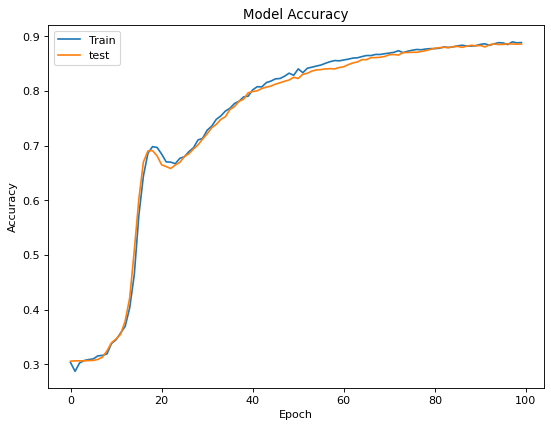

<Figure size 432x288 with 0 Axes>

In [109]:
# Accuracy vs Epoch graph
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'test'], loc='upper left')
plt.show()
plt.savefig('ac')

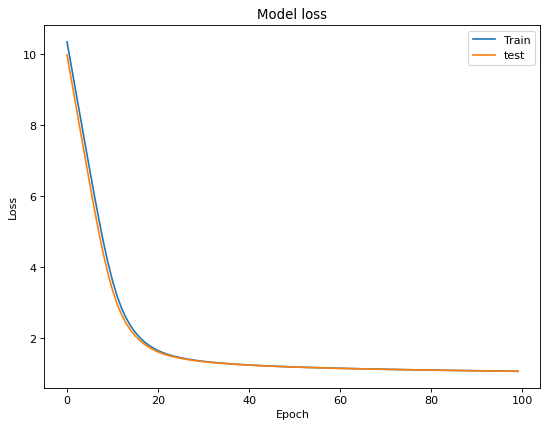

<Figure size 432x288 with 0 Axes>

In [101]:
# Loss vs Epoch graph
figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'test'], loc='upper right')
plt.show()
plt.savefig('ls')

In [102]:
#Prediction on X_test

pred = model.predict(X_test)
pred

array([[3.46112969e-08, 3.41997151e-08, 3.39189441e-08, ...,
        3.41229622e-08, 3.44459927e-08, 3.42480853e-08],
       [7.70351562e-07, 7.75779199e-07, 7.76569038e-07, ...,
        7.75248168e-07, 7.74050648e-07, 7.75271758e-07],
       [1.07614497e-07, 1.06148669e-07, 1.05767612e-07, ...,
        1.06201114e-07, 1.06701094e-07, 1.06292305e-07],
       ...,
       [2.62519848e-07, 2.58847479e-07, 2.59829363e-07, ...,
        2.59996682e-07, 2.59224464e-07, 2.59118423e-07],
       [3.82736793e-08, 3.79315992e-08, 3.75425664e-08, ...,
        3.77859521e-08, 3.82178769e-08, 3.79789462e-08],
       [1.37463289e-07, 1.35381683e-07, 1.35424941e-07, ...,
        1.35763358e-07, 1.35861399e-07, 1.35558679e-07]], dtype=float32)

In [103]:
# Transforming categorical values

y_pred = []
for i in range(0,9216):
    y_pred.append(np.argmax(pred[i]))

In [104]:
# Importing the confusion_matrix and classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [105]:
np.array(y_pred)

array([34839, 34859, 34829, ..., 34809, 34839, 34819], dtype=int64)

In [106]:
# Creating confusion matrix

confusion_matrix(y_test, np.array(y_pred))

array([[601, 191,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 755,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 33,  36, 168,  50,  28,  25,  38,  37,  73, 124,  85,  58],
       [  0,   0,   0, 782,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  48, 678,  31,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  14, 765,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   4, 792,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 718,  84,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 744,   0,   0,   0],
       [  0,   0,  30,   0,   0,   0,   0,   0,   0, 687,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 719,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 780]],
      dtype=int64)

In [107]:
# classification report

print(classification_report(y_test, np.array(y_pred)))

              precision    recall  f1-score   support

       29655       0.95      0.76      0.84       792
       29665       0.77      1.00      0.87       755
       34779       0.85      0.22      0.35       755
       34789       0.89      1.00      0.94       782
       34799       0.94      0.90      0.92       757
       34809       0.93      0.98      0.95       779
       34819       0.95      0.99      0.97       797
       34829       0.95      0.90      0.92       802
       34839       0.83      1.00      0.90       744
       34849       0.82      0.96      0.88       717
       34859       0.89      0.96      0.92       749
       34869       0.93      0.99      0.96       787

    accuracy                           0.89      9216
   macro avg       0.89      0.89      0.87      9216
weighted avg       0.89      0.89      0.87      9216



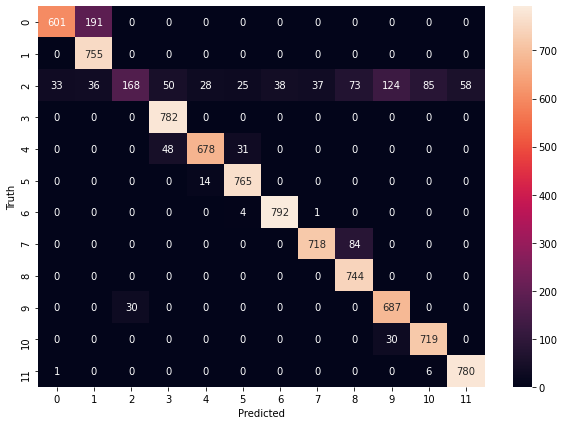

In [108]:
# Heatmap of confusion matrix
cm = confusion_matrix(y_test,np.array(y_pred))

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confus')